In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Gradient descent optimization
# The learning rate is specified by eta
class GDOptimizer(object):
    def __init__(self, eta):
        self.eta = eta

    def initialize(self, layers):
        pass

    # This function performs one gradient descent step
    # layers is a list of dense layers in the network
    # g is a list of gradients going into each layer before the nonlinear activation
    # a is a list of of the activations of each node in the previous layer going 
    def update(self, layers, g, a):
        m = a[0].shape[1]
        for layer, curGrad, curA in zip(layers, g, a):
            # TODO #################################################################################
            # Compute the gradients for layer.W and layer.b using the gradient for the output of the
            layer.W = layer.W - self.eta*np.dot(curGrad,curA.T)/m
            layer.b = layer.b - self.eta*np.mean(curGrad,axis =1).reshape(layer.b.shape)
            # layer curA and the gradient of the output curGrad
            # Use the gradients to update the weight and the bias for the layer
            # ######################################################################################
            # pass

# Cost function used to compute prediction errors
class QuadraticCost(object):

    # Compute the squared error between the prediction yp and the observation y
    # This method should compute the cost per element such that the output is the
    # same shape as y and yp
    @staticmethod
    def fx(y,yp):
        # TODO #################################################################################
        return np.multiply(y - yp, y - yp) / 2.0
        # ######################################################################################
        # pass

    # Derivative of the cost function with respect to yp
    @staticmethod
    def dx(y,yp):
        # TODO #################################################################################
        return  -(y - yp)
        # ######################################################################################
        # pass

# Sigmoid function fully implemented as an example
class SigmoidActivation(object):
    @staticmethod
    def fx(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def dx(z):
        return SigmoidActivation.fx(z) * (1 - SigmoidActivation.fx(z))
        
# Hyperbolic tangent function
class TanhActivation(object):

    # Compute tanh for each element in the input z
    @staticmethod
    def fx(z):
        # TODO #################################################################################
        return np.tanh(z)
        # ######################################################################################
        #pass

    # Compute the derivative of the tanh function with respect to z
    @staticmethod
    def dx(z):
        # TODO #################################################################################
        return 1 - np.tanh(z)**2
        # ######################################################################################
        # pass

# Rectified linear unit
class ReLUActivation(object):
    @staticmethod
    def fx(z):
        # TODO #################################################################################
        return np.maximum(z,0)
        # ######################################################################################
        # pass

    @staticmethod
    def dx(z):
        # TODO #################################################################################
        ztemp = np.maximum(z,0)
        ztemp[ztemp>0] = 1
        return ztemp
        # ######################################################################################
        # pass

# Linear activation
class LinearActivation(object):
    @staticmethod
    def fx(z):
        # TODO #################################################################################
        return z
        # ######################################################################################
        # pass

    @staticmethod
    def dx(z):
        # TODO #################################################################################
        return np.ones((np.size(z,0),np.size(z,1)),dtype = np.float)
        # ######################################################################################
        # pass

# This class represents a single hidden or output layer in the neural network
class DenseLayer(object):

    # numNodes: number of hidden units in the layer
    # activation: the activation function to use in this layer
    def __init__(self, numNodes, activation):
        self.numNodes = numNodes
        self.activation = activation

    def getNumNodes(self):
        return self.numNodes

    # Initialize the weight matrix of this layer based on the size of the matrix W
    def initialize(self, fanIn, scale=1.0):
        s = scale * np.sqrt(6.0 / (self.numNodes + fanIn))
        self.W = np.random.normal(0, s,
                                   (self.numNodes,fanIn))
        self.b = np.zeros((self.numNodes,1))

    # Apply the activation function of the layer on the input z
    def a(self, z):
        return self.activation.fx(z)

    # Compute the linear part of the layer
    # The input a is an n x k matrix where n is the number of samples
    # and k is the dimension of the previous layer (or the input to the network)
    def z(self, a):
        return self.W.dot(a) + self.b # Note, this is implemented where we assume a is k x n

    # Compute the derivative of the layer's activation function with respect to z
    # where z is the output of the above function.
    # This derivative does not contain the derivative of the matrix multiplication
    # in the layer.  That part is computed below in the model class.
    def dx(self, z):
        return self.activation.dx(z)

    # Update the weights of the layer by adding dW to the weights
    def updateWeights(self, dW):
        self.W = self.W + dW

    # Update the bias of the layer by adding db to the bias
    def updateBias(self, db):
        self.b = self.b + db

# This class handles stacking layers together to form the completed neural network
class Model(object):

    # inputSize: the dimension of the inputs that go into the network
    def __init__(self, inputSize):
        self.layers = []
        self.inputSize = inputSize

    # Add a layer to the end of the network
    def addLayer(self, layer):
        self.layers.append(layer)

    # Get the output size of the layer at the given index
    def getLayerSize(self, index):
        if index >= len(self.layers):
            return self.layers[-1].getNumNodes()
        elif index < 0:
            return self.inputSize
        else:
            return self.layers[index].getNumNodes()

    # Initialize the weights of all of the layers in the network and set the cost
    # function to use for optimization
    def initialize(self, cost, initializeLayers=True):
        self.cost = cost
        if initializeLayers:
            for i in range(0,len(self.layers)):
                if i == len(self.layers) - 1:
                    self.layers[i].initialize(self.getLayerSize(i-1))
                else:
                    self.layers[i].initialize(self.getLayerSize(i-1))

    # Compute the output of the network given some input a
    # The matrix a has shape n x k where n is the number of samples and
    # k is the dimension
    # This function returns
    # yp - the output of the network
    # a - a list of inputs for each layer of the newtork where
    #     a[i] is the input to layer i
    # z - a list of values for each layer after evaluating layer.z(a) but
    #     before evaluating the nonlinear function for the layer
    def evaluate(self, x):
        curA = x.T
        a = [curA]
        z = []
        for layer in self.layers:
            # TODO #################################################################################
            # Store the input to each layer in the list a
            # Store the result of each layer before applying the nonlinear function in z
            # Set yp equal to the output of the network
            ztemp = layer.z(a[-1])
            z.append(ztemp) 
            atemp = layer.a(z[-1])
            a.append(atemp)
        yp = a[-1]
        a = a[:-1]           
            # ######################################################################################
            # pass

        return yp, a, z

    # Compute the output of the network given some input a
    # The matrix a has shape n x k where n is the number of samples and
    # k is the dimension
    def predict(self, a):
        a,_,_ = self.evaluate(a)
        return a.T

    # Train the network given the inputs x and the corresponding observations y
    # The network should be trained for numEpochs iterations using the supplied
    # optimizer
    def train(self, x, y, numEpochs, optimizer, batch_size):

        # Initialize some stuff
        n = x.shape[0]
        x = x.copy()
        y = y.copy()
        hist = []
        optimizer.initialize(self.layers)
        
        # Run for the specified number of epochs
        for epoch in range(0,numEpochs):

            for i in range(0, n, batch_size) :
                # Feed forward
                # Save the output of each layer in the list a
                # After the network has been evaluated, a should contain the
                # input x and the output of each layer except for the last layer
                yp, a, z = self.evaluate(x[i:i+batch_size,:])

                # Compute the error
                C = self.cost.fx(y[i:i+batch_size,:].T,yp)
                d = self.cost.dx(y[i:i+batch_size,:].T,yp)
                grad = []

                # Backpropogate the error
                idx = len(self.layers)

                for layer, curZ in zip(reversed(self.layers),reversed(z)):
                    # TODO #################################################################################
                    # Compute the gradient of the output of each layer with respect to the error
                    # grad[i] should correspond with the gradient of the output of layer i
                    # ######################################################################################
                    # pass
                    if idx == len(self.layers):
                        grad.append(np.multiply(d,layer.activation.dx(curZ)))
                    else:
                        grad.append(np.multiply(np.dot(wTemp,grad[-1]),layer.activation.dx(curZ))) 
                    wTemp = layer.W.T
                    idx = idx - 1
                grad = list(reversed(grad))
                # Update the errors
                optimizer.update(self.layers, grad, a)

            # Compute the error at the end of the epoch
            yh = self.predict(x)
            C = self.cost.fx(yh,y)
            C = np.mean(C)
            hist.append(C)
        return hist

# defg)

ReLU MSE: 0.00684167531631


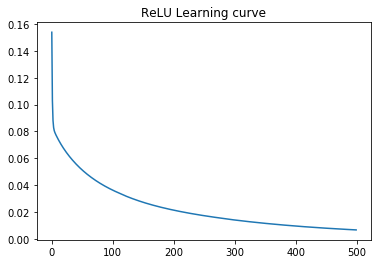

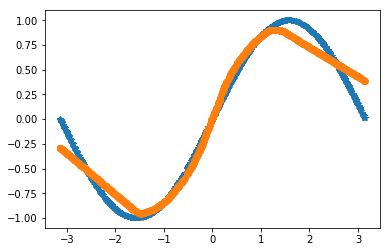

tanh MSE: 0.00224040515126


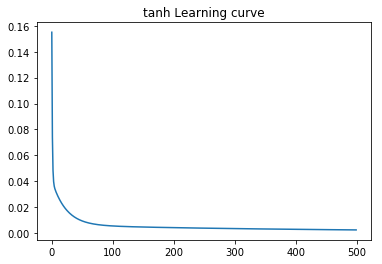

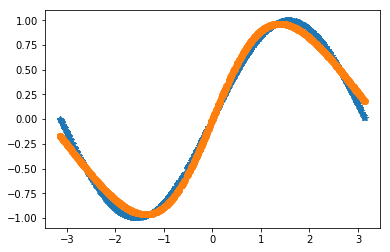

linear MSE: 0.0967346963549


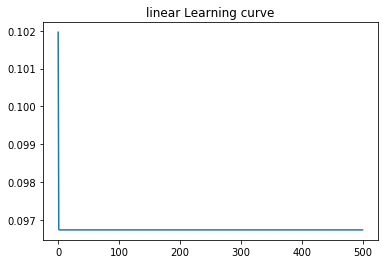

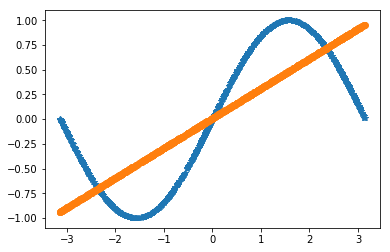

In [103]:
if __name__ == '__main__':

    # Generate the training set
    np.random.seed(9001)
    x=np.random.uniform(-np.pi,np.pi,(1000,1))
    y=np.sin(x)

    activations = dict(ReLU=ReLUActivation,
                       tanh=TanhActivation,
                       linear=LinearActivation)
    lr = dict(ReLU=0.02,tanh=0.02,linear=0.005)

    for key in activations:

        # Build the model
        activation = activations[key]
        model = Model(x.shape[1])
        model.addLayer(DenseLayer(100,activation()))
        model.addLayer(DenseLayer(100,activation()))
        model.addLayer(DenseLayer(1,LinearActivation()))
        model.initialize(QuadraticCost())

        # Train the model and display the results
        hist = model.train(x,y,500,GDOptimizer(eta=lr[key]), 1000)
        yHat = model.predict(x)
        error = np.mean(np.square(yHat - y))/2
        print(key+' MSE: '+str(error))
        plt.plot(hist)
        plt.title(key+' Learning curve')
        plt.show()

        # TODO #################################################################################
        # Plot the approximation of the sin function from all of the models
        plt.plot(x,y, '*')
        plt.plot(x,yHat,'o')
        plt.show()
        # ######################################################################################

# h)

# Depth = 3

In [104]:
if __name__ == '__main__':

    # Generate the training set
    np.random.seed(9001)
    x=np.random.uniform(-np.pi,np.pi,(1000,1))
    y=np.sin(x)

    activations = dict(ReLU=ReLUActivation,
                       tanh=TanhActivation,
                       linear=LinearActivation)
    lr = dict(ReLU=0.02,tanh=0.02,linear=0.005)
    nodeSize_l = [5,10,25,50]
    for nodeSize in nodeSize_l:
        for key in activations:

            # Build the model
            activation = activations[key]
            model = Model(x.shape[1])
            model.addLayer(DenseLayer(nodeSize,activation()))
            model.addLayer(DenseLayer(nodeSize,activation()))
            model.addLayer(DenseLayer(nodeSize,LinearActivation()))
            model.initialize(QuadraticCost())

            # Train the model and display the results
            hist = model.train(x,y,500,GDOptimizer(eta=lr[key]), 1000)
            yHat = model.predict(x)
            error = np.mean(np.square(yHat - y))/2
            print('NodeSize:'+str(nodeSize)+key+' MSE: '+str(error))
            #plt.plot(hist)
            #plt.title(key+' Learning curve')
            #plt.show()

            # TODO #################################################################################
            # Plot the approximation of the sin function from all of the models
            #plt.plot(x,y, '*')
            #plt.plot(x,yHat,'o')
            #plt.show()
            # ######################################################################################

NodeSize:5ReLU MSE: 0.0233597881838
NodeSize:5tanh MSE: 0.0214648256952
NodeSize:5linear MSE: 0.096734718977
NodeSize:10ReLU MSE: 0.0162789613305
NodeSize:10tanh MSE: 0.01970545141
NodeSize:10linear MSE: 0.0967347269163
NodeSize:25ReLU MSE: 0.00262489530034
NodeSize:25tanh MSE: 0.00620770725242
NodeSize:25linear MSE: 0.0967347054405
NodeSize:50ReLU MSE: 0.00437158064479
NodeSize:50tanh MSE: 0.01021321621
NodeSize:50linear MSE: 0.0967347003152


# depth = 2

In [105]:
if __name__ == '__main__':

    # Generate the training set
    np.random.seed(9001)
    x=np.random.uniform(-np.pi,np.pi,(1000,1))
    y=np.sin(x)

    activations = dict(ReLU=ReLUActivation,
                       tanh=TanhActivation,
                       linear=LinearActivation)
    lr = dict(ReLU=0.02,tanh=0.02,linear=0.005)
    nodeSize_l = [5,10,25,50]
    for nodeSize in nodeSize_l:
        for key in activations:

            # Build the model
            activation = activations[key]
            model = Model(x.shape[1])
            model.addLayer(DenseLayer(nodeSize,activation()))
            model.addLayer(DenseLayer(nodeSize,activation()))
            #model.addLayer(DenseLayer(nodeSize,LinearActivation()))
            model.initialize(QuadraticCost())

            # Train the model and display the results
            hist = model.train(x,y,500,GDOptimizer(eta=lr[key]), 1000)
            yHat = model.predict(x)
            error = np.mean(np.square(yHat - y))/2
            print('NodeSize:'+str(nodeSize)+key+' MSE: '+str(error))
            #plt.plot(hist)
            #plt.title(key+' Learning curve')
            #plt.show()

            # TODO #################################################################################
            # Plot the approximation of the sin function from all of the models
            #plt.plot(x,y, '*')
            #plt.plot(x,yHat,'o')
            #plt.show()
            # ######################################################################################

NodeSize:5ReLU MSE: 0.188586420577
NodeSize:5tanh MSE: 0.032066262804
NodeSize:5linear MSE: 0.0967354026467
NodeSize:10ReLU MSE: 0.213824199911
NodeSize:10tanh MSE: 0.0266254366438
NodeSize:10linear MSE: 0.0967347738012
NodeSize:25ReLU MSE: 0.187544468461
NodeSize:25tanh MSE: 0.0283601523481
NodeSize:25linear MSE: 0.0967347025341
NodeSize:50ReLU MSE: 0.180689589239
NodeSize:50tanh MSE: 0.0223763587072
NodeSize:50linear MSE: 0.0967347084438


# depth = 1

In [101]:
if __name__ == '__main__':

    # Generate the training set
    np.random.seed(9001)
    x=np.random.uniform(-np.pi,np.pi,(1000,1))
    y=np.sin(x)

    activations = dict(ReLU=ReLUActivation,
                       tanh=TanhActivation,
                       linear=LinearActivation)
    lr = dict(ReLU=0.02,tanh=0.02,linear=0.005)
    nodeSize_l = [5,10,25,50]
    for nodeSize in nodeSize_l:
        for key in activations:

            # Build the model
            activation = activations[key]
            model = Model(x.shape[1])
            model.addLayer(DenseLayer(nodeSize,activation()))
            #model.addLayer(DenseLayer(nodeSize,activation()))
            #model.addLayer(DenseLayer(nodeSize,LinearActivation()))
            model.initialize(QuadraticCost())

            # Train the model and display the results
            hist = model.train(x,y,500,GDOptimizer(eta=lr[key]), 1000)
            yHat = model.predict(x)
            error = np.mean(np.square(yHat - y))/2
            print('NodeSize:'+str(nodeSize)+key+' MSE: '+str(error))
            #plt.plot(hist)
            #plt.title(key+' Learning curve')
            #plt.show()

            # TODO #################################################################################
            # Plot the approximation of the sin function from all of the models
            #plt.plot(x,y, '*')
            #plt.plot(x,yHat,'o')
            #plt.show()
            # ######################################################################################

NodeSize:5ReLU MSE: 0.192063956192
NodeSize:5tanh MSE: 0.0583296871098
NodeSize:5linear MSE: 0.0967370497222
NodeSize:10ReLU MSE: 0.201100031878
NodeSize:10tanh MSE: 0.0589004346013
NodeSize:10linear MSE: 0.0967350951925
NodeSize:25ReLU MSE: 0.217364704227
NodeSize:25tanh MSE: 0.0586952807986
NodeSize:25linear MSE: 0.0967366024839
NodeSize:50ReLU MSE: 0.204714233822
NodeSize:50tanh MSE: 0.0586419014661
NodeSize:50linear MSE: 0.0967359899126


# j)

In [1]:
if __name__ == '__main__':

    # Generate the training set
    np.random.seed(9001)
    x=np.random.uniform(-np.pi,np.pi,(1000,1))
    y=np.sin(x)

    activations = dict(ReLU=ReLUActivation,
                       tanh=TanhActivation,
                       linear=LinearActivation)
    lr = dict(ReLU=0.02,tanh=0.02,linear=0.005)
    batch_sizes = [2, 5, 25, 50, 100, 200, 500, 1000]
    
    for batch_size in batch_sizes :
        for key in activations:

            # Build the model
            activation = activations[key]
            model = Model(x.shape[1])
            model.addLayer(DenseLayer(100,activation()))
            model.addLayer(DenseLayer(100,activation()))
            model.addLayer(DenseLayer(1,LinearActivation()))
            model.initialize(QuadraticCost())

            # Train the model and display the results
            hist = model.train(x,y,500,GDOptimizer(eta=lr[key]), batch_size)
            yHat = model.predict(x)
            error = np.mean(np.square(yHat - y))/2
            print(key+' MSE: '+str(error))
            plt.plot(hist)
            plt.title(key+' Learning curve')
            plt.show()

            # TODO #################################################################################
            # Plot the approximation of the sin function from all of the models
            plt.plot(x,y, '*')
            plt.plot(x,yHat,'o')
            plt.show()
            # ######################################################################################

NameError: name 'np' is not defined